## Ejercicios

1) Levantar la base de Titanic.  
2) Realizar una breve descripción de las variables.   
3) ¿Cuál es la mediana de la edad de las personas que fallecen?   
4) ¿Existen variables con valores faltantes? Si la variable posee menos del 20% de los faltantes, realizar algun tratamiento para poder imputar valores. Si el faltante es mayor, eliminar la columna.   
5) Convertir la variable Embarked es una variable dummy.
6) La/s variable/s creadas en el punto 5 renombrarlas agregando un sufijo "Embarked_" y el nombre de la columna.  
6) Eliminar la variable "Embarked".   
7) Crear un gráfico de tortas mostrando la cantidad de pasajeros abierto por Género.   
8) Crear una variable que indique los deciles del campo "Fare".   


### Ejercicio 1 ###

In [22]:
import pandas as pd
import numpy as np
import os
contentFolder = "./Data"
data = pd.read_csv("{}/titanic_train.txt".format(contentFolder))


### Ejercicio 2 ###

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Ejercicio 3 ###

In [9]:
data[data.Survived==0].Age.median()

28.0

### Ejercicio 4 ###

In [23]:
meanAge = data.groupby(["Sex", "Survived"]).Age.mean().to_frame("MeanAge").reset_index()
meanAge

,Sex,Survived,MeanAge
0,female,0,25.046875
1,female,1,28.847716
2,male,0,31.618056
3,male,1,27.276022


In [24]:
data = pd.merge(data,meanAge,how="inner", on=["Sex", "Survived"])
data["Age"] = np.where(data.Age.isnull(), data.MeanAge, data.Age)
data.drop(columns=["MeanAge"], inplace = True)

In [26]:
data.drop(columns=["Cabin"], inplace=True)

### Ejercicio 5 ###

In [29]:
data = data.join(pd.get_dummies(data.Embarked).astype(int))

### Ejercicio 6 ###

In [43]:
data.columns = list(data.columns[:-3])+["Embarked_{}".format(x) for x in data.columns[-3:]]

### Ejercicio 7 ###

In [44]:
data.drop(columns=["Embarked"], inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,0,1
1,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,0,1
2,6,0,3,"Moran, Mr. James",male,31.618056,0,0,330877,8.4583,0,1,0
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,0,0,1
4,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,0,0,1


### Ejercicio 8 ###

<Axes: ylabel='q'>

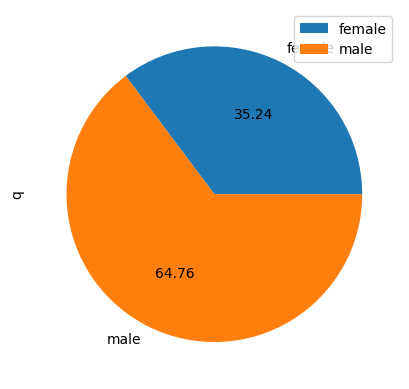

In [58]:
SexGroup = data.groupby("Sex").size().to_frame("q")
SexGroup.plot.pie(y="q", autopct='%.2f')

### Ejercicio 9 ###

In [61]:
data["FareDeciles"] = pd.qcut(data.Fare, 10, labels=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FareDeciles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,0,1,0
1,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,0,1,2
2,6,0,3,"Moran, Mr. James",male,31.618056,0,0,330877,8.4583,0,1,0,3
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,0,0,1,8
4,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,0,0,1,5
